In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Carga dos dados

In [2]:
# Abrir o dataaset
df_farm = pd.read_csv('./dataset/dados_de_irrigacao.csv')

In [3]:
# Checar a estrutura do dataset
df_farm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [4]:
# Visualizar as primeiras linhas do dataset
df_farm.head()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333


In [5]:
# Visualizar as últimas linhas do dataset
df_farm.tail()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667
298,299,29900,19933.333333


### EDA

In [6]:
# Renomear campos
df_farm = df_farm.rename(columns={
  'Horas de Irrigação': 'horas_de_irrigacao',
  'Área Irrigada': 'area_irrigada',
  'Área Irrigada por Ângulo': 'area_irrigada_por_angulo',
})

In [7]:
# Medidas estatísticas das variáveis
df_farm.describe()

,horas_de_irrigacao,area_irrigada,area_irrigada_por_angulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


<Axes: xlabel='horas_de_irrigacao', ylabel='area_irrigada_por_angulo'>

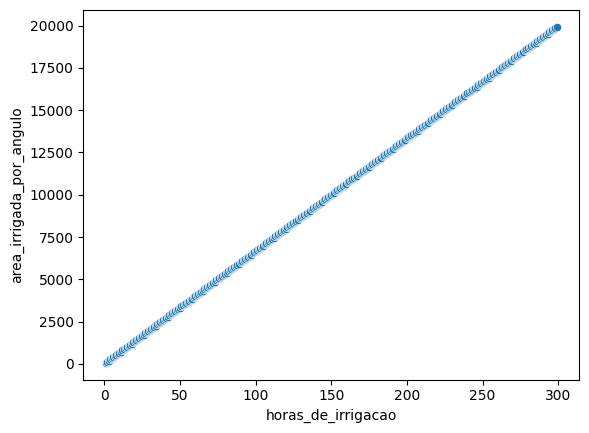

In [8]:
# Gráfico de dispersão
sns.scatterplot(data=df_farm, x='horas_de_irrigacao', y='area_irrigada_por_angulo')

<Axes: >

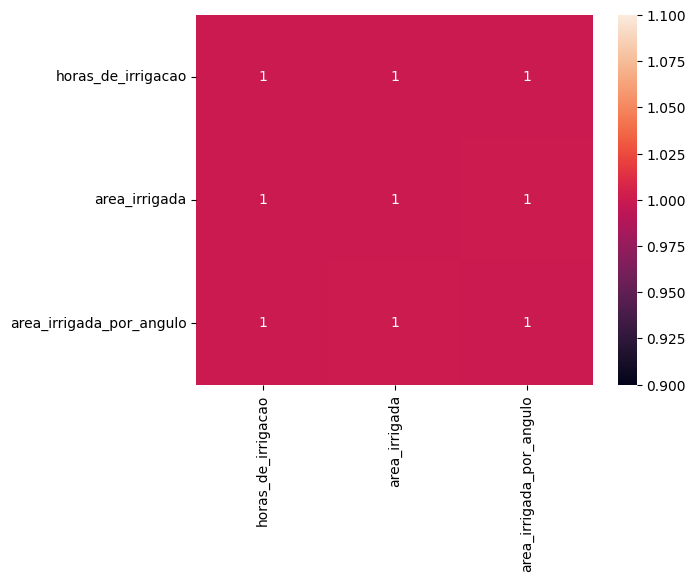

In [9]:
# Correlação entre as variáveis - Pearson
sns.heatmap(df_farm.corr(), annot=True)

### Treinar Modelo

In [10]:
from sklearn.model_selection import train_test_split

# Divisão dos dados entre treino e teste
X = df_farm['horas_de_irrigacao'].values.reshape(-1, 1)
y = df_farm['area_irrigada_por_angulo'].values.reshape(-1, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [12]:
# Instânciar o modelo de Regressão Linear
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

In [13]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Imprimir a equação da reta
print("A equação da reta é: y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é: y = 66.666667x + -0.000000


### Validar o modelo

In [15]:
# Fazer previsões
y_pred = reg_model.predict(X_test)

In [16]:
# Calcular a métrica MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1.846305824276189e-12

In [17]:
# Calcular a métrica MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

6.205301890955153e-24

In [18]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

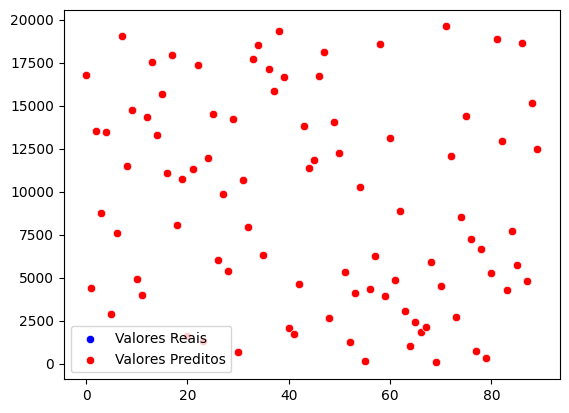

In [19]:
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')
plt.legend()
plt.show()

### Análise de Resíduos

In [20]:
# Calcular resíduos
residuos = y_test - y_pred

In [21]:
from scipy.stats import zscore
residuos_std = zscore(residuos)

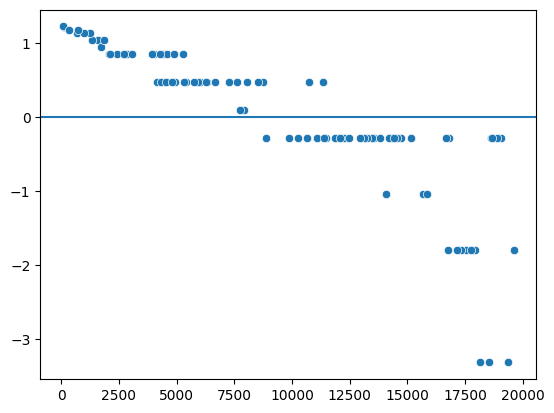

In [22]:
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

In [23]:
import pingouin as pg

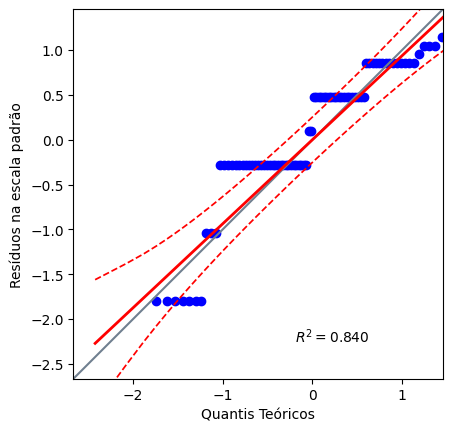

In [24]:
pg.qqplot(residuos_std, dist='norm', confidence=0.959)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [25]:
from scipy.stats import shapiro, kstest

stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.8399351034128089 e P-valor: 1.8971821592926245e-08


In [26]:
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {} e P-valor: {}".format(stat_ks, p_valor_ks))

Estatística do teste: 0.4999999999985544 e P-valor: 2.4869515023113054e-21


### Fazer predições com o modelo

In [27]:
# Prever a área irrigada por ângulo para 15 horas de irrigação
horas_de_irrigacao = 15
area_irrigada_por_angulo = reg_model.predict([[horas_de_irrigacao]])
print("A área irrigada por ângulo para 15 horas de irrigação é: {:.2f}".format(area_irrigada_por_angulo[0][0]))

A área irrigada por ângulo para 15 horas de irrigação é: 1000.00
